In [1]:
from helpers.what_if_helpers import run_base_and_intervention, baseline_pars, init_intervention_for_inf_thresh, inf_thresh_callback
import covasim as cv
cv.options.set(dpi=100, show=False, close=True, verbose=0)  # Standard options for Jupyter notebook

Covasim 3.0.7 (2021-06-29) — © 2021 by IDM


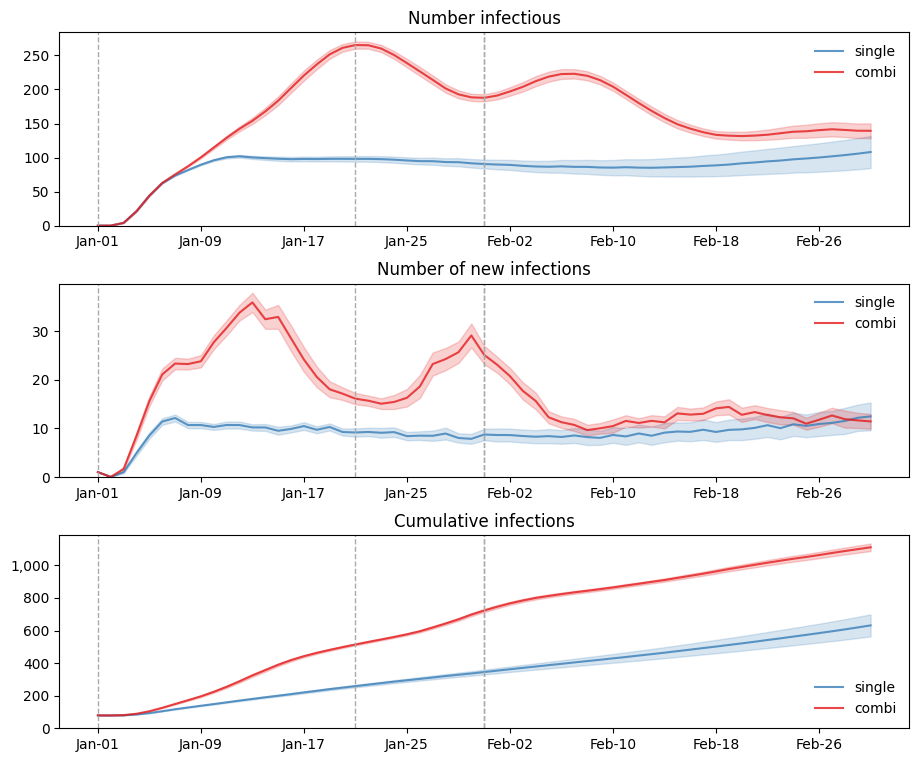

In [2]:
from helpers.what_if_helpers import init_intervention_for_inf_thresh, inf_thresh_callback
pfizer_high = cv.vaccinate_prob(vaccine='pfizer', days=0, prob=0.682)  # https://impfdashboard.de/
pfizer_low = cv.vaccinate_prob(vaccine='pfizer', days=[i for i in range(baseline_pars['n_days'])], prob=1 / 180,  do_plot=False)                         
single_sim = cv.Sim(baseline_pars, interventions=[pfizer_low, pfizer_high], label='single')
tn_low = cv.test_num(daily_tests=50, start_day=30)
ct_low = cv.contact_tracing(trace_probs=dict(h=0.5, s=0.25, w=0.25, c=0.15))
ce = cv.clip_edges(days=inf_thresh_callback(200), changes=[1 / 4, 1.0])
init_intervention_for_inf_thresh(ce)
combi_sim = cv.Sim(baseline_pars, interventions=[pfizer_low, ce, tn_low, ct_low], label='combi')
multi_sim = run_base_and_intervention(single_sim, combi_sim)
multi_sim.plot(to_plot=["n_infectious", "new_infections", "cum_infections"])